# [Data’s Type](https://medium.com/geekculture/knowing-your-datas-type-28f4b2ad8a21)

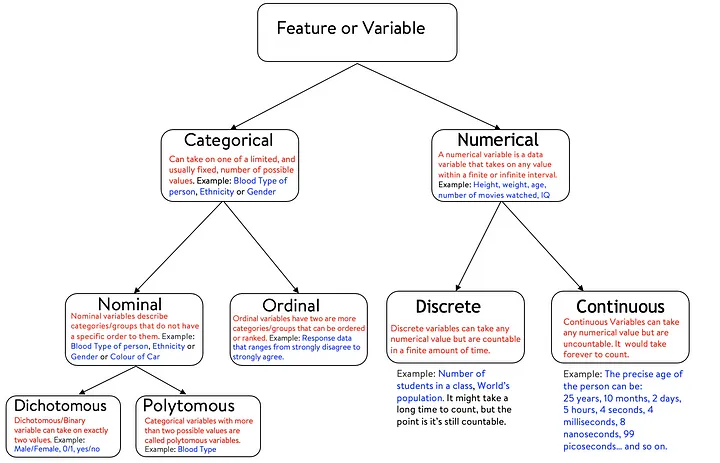

Source - https://medium.com/geekculture/knowing-your-datas-type-28f4b2ad8a21

___
## Imports

In [4]:
import seaborn as sns
df = sns.load_dataset('tips')
import matplotlib.pyplot as plt
%matplotlib inline

# [Numeric Data Plots](https://seaborn.pydata.org/api.html#distribution-api)

[Interpreting Histograms](https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1#:~:text=A%20histogram%20shows%20how%20frequently,to%20be%20discrete%20positive%20integers.)

In [5]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
df.shape

(244, 7)

In [7]:
df["time"]

0      Dinner
1      Dinner
2      Dinner
3      Dinner
4      Dinner
        ...  
239    Dinner
240    Dinner
241    Dinner
242    Dinner
243    Dinner
Name: time, Length: 244, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

In [8]:
type(df['time'])

pandas.core.series.Series

In [9]:
df2=df[df['time']=='Dinner']
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
df['tip'].max()

10.0

<Axes: xlabel='tip', ylabel='Count'>

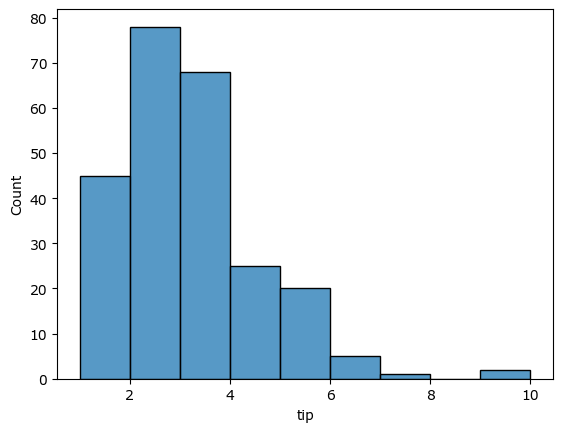

In [11]:
sns.histplot(x="tip",data=df,bins=9)

## kdeplot

<Axes: xlabel='tip', ylabel='Density'>

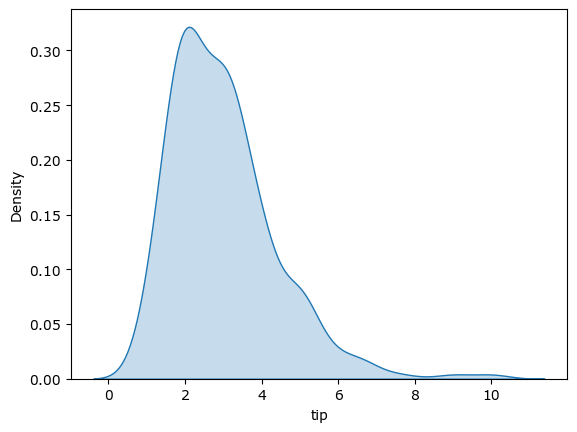

In [12]:
sns.kdeplot(x="tip",data=df, fill=True)

## [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

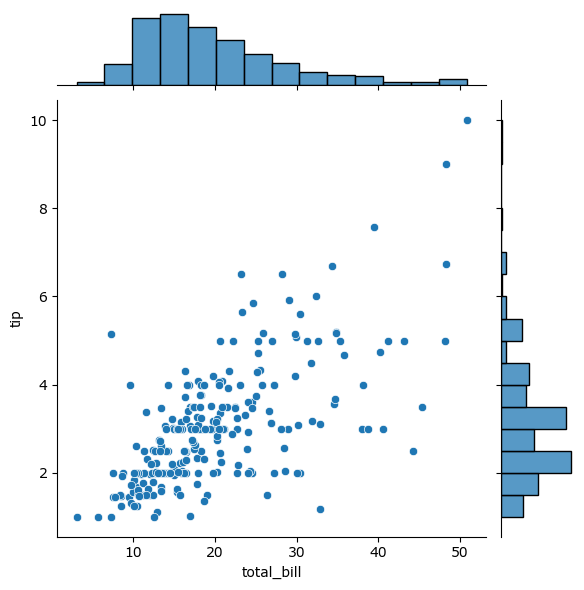

In [13]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='scatter')
 #kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

## [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)

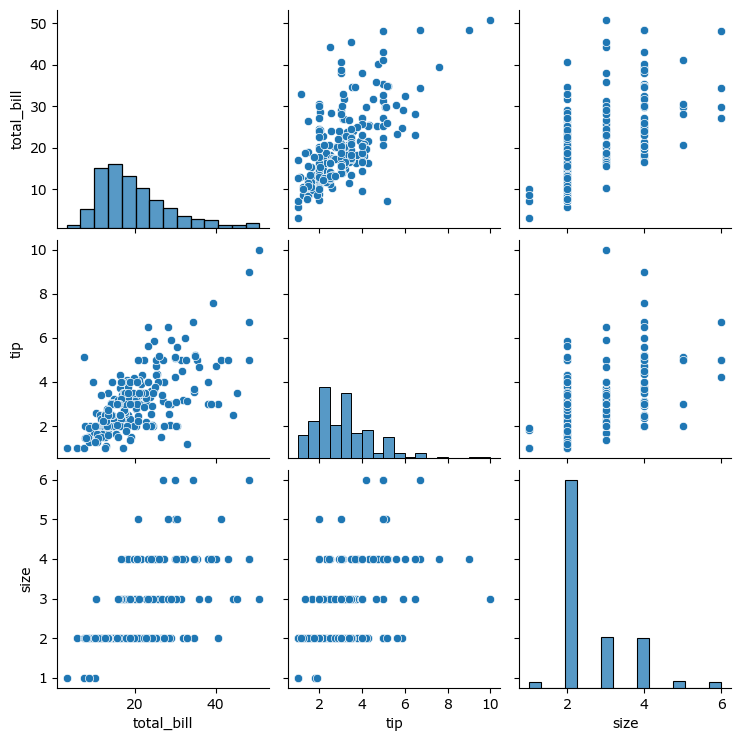

In [14]:
sns.pairplot(df)

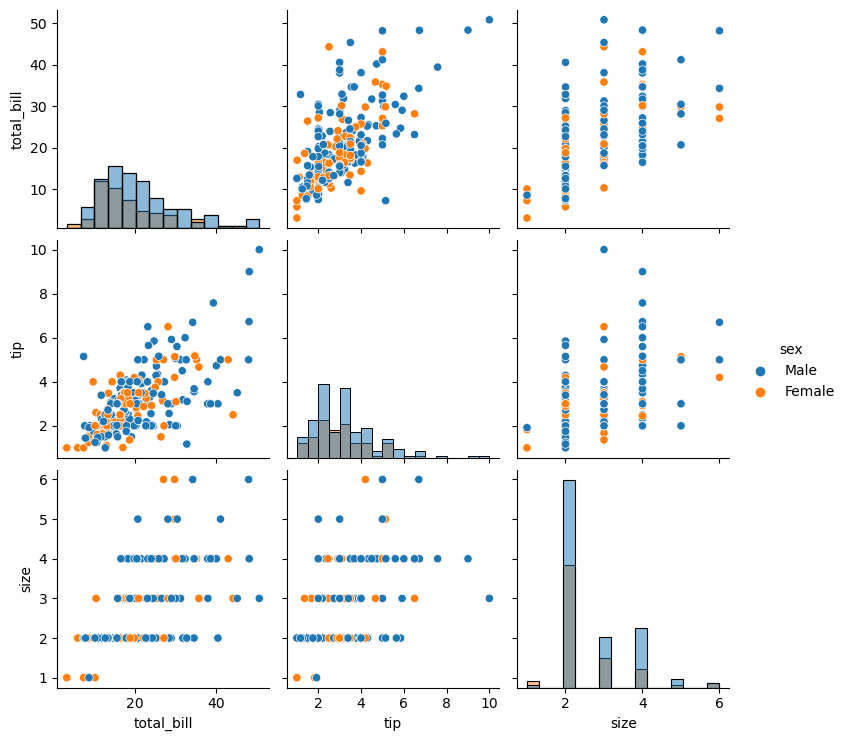

In [13]:
sns.pairplot(df,hue='sex',diag_kind='hist')

# [Categorical Data Plots](https://seaborn.pydata.org/api.html#categorical-plots)

## barplot

In [15]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<Axes: xlabel='sex', ylabel='tip'>

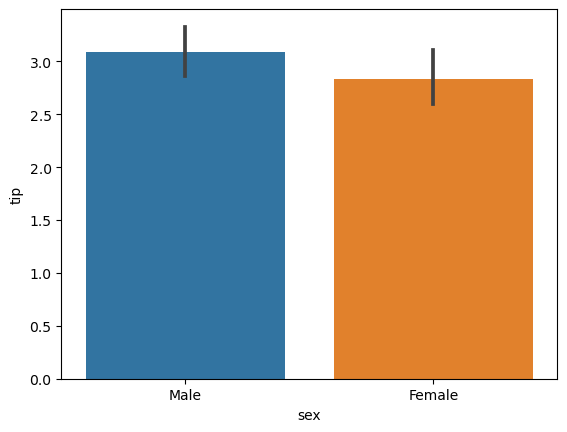

In [15]:
sns.barplot(x='sex',y='tip',data=df) # estimator is mean

In [16]:
print(df[df['sex']=='Male']['tip'].mean())
print(df[df['sex']=='Female']['tip'].mean())

3.0896178343949043
2.8334482758620685


In [17]:
df[df['sex']=='Male']['tip'].mean()

3.0896178343949043

## countplot

<Axes: xlabel='sex', ylabel='count'>

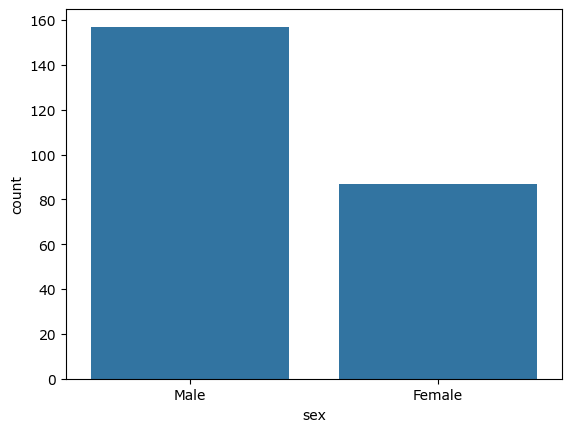

In [17]:
sns.countplot(x='sex',data=df) # estimator is count

## Boxplot
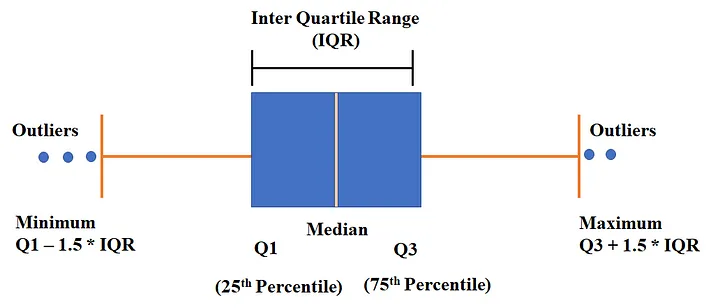

Source - https://medium.datadriveninvestor.com/statistical-analysis-part-1-box-and-whisker-plot-for-detecting-outliers-5a260f09cb01

[Visualizing the box and whisker plot](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm) -- [Video](https://www.youtube.com/watch?v=Vo-bfTqEFQk&list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j&index=5)

<Axes: xlabel='tip'>

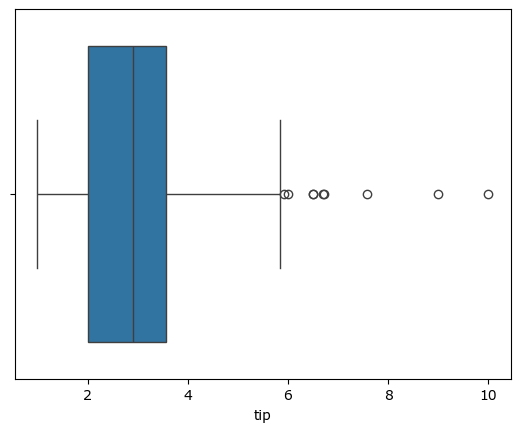

In [18]:
sns.boxplot(data=df['tip'],orient='h')

In [20]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [19]:
df.median(numeric_only=True)

total_bill    17.795
tip            2.900
size           2.000
dtype: float64

<Axes: xlabel='sex', ylabel='tip'>

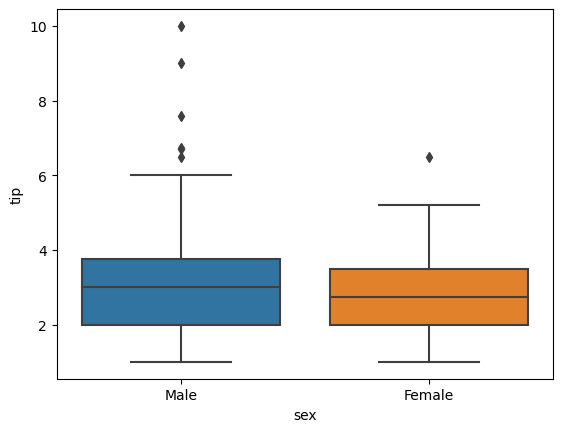

In [22]:
sns.boxplot(x="sex", y="tip", data=df)

<Axes: xlabel='tip', ylabel='day'>

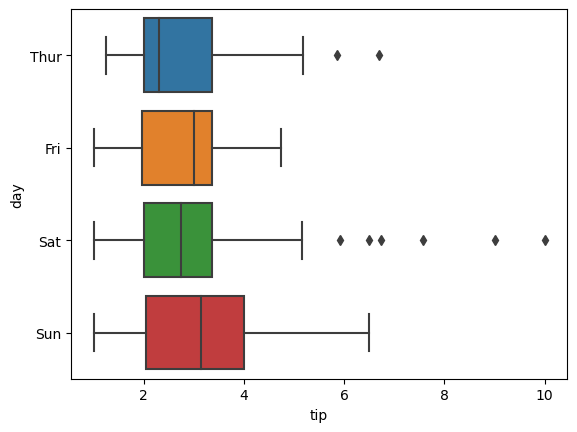

In [25]:
sns.boxplot(x="tip",y="day", data=df, orient='h')

# [Matrix Plots](https://seaborn.pydata.org/api.html#matrix-plots)

## Heatmap

In [20]:
# Matrix form for correlation data
matrix_data_corr=df.corr(numeric_only=True)
matrix_data_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

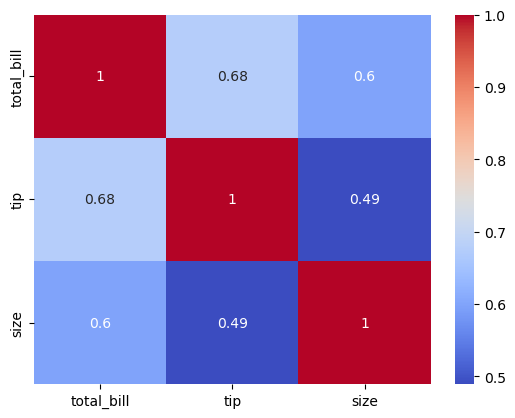

In [27]:
sns.heatmap(matrix_data_corr,annot=True,cmap='coolwarm')

# [Grids](https://seaborn.pydata.org/api.html#multi-plot-grids)

## [Facet Grid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

In [28]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

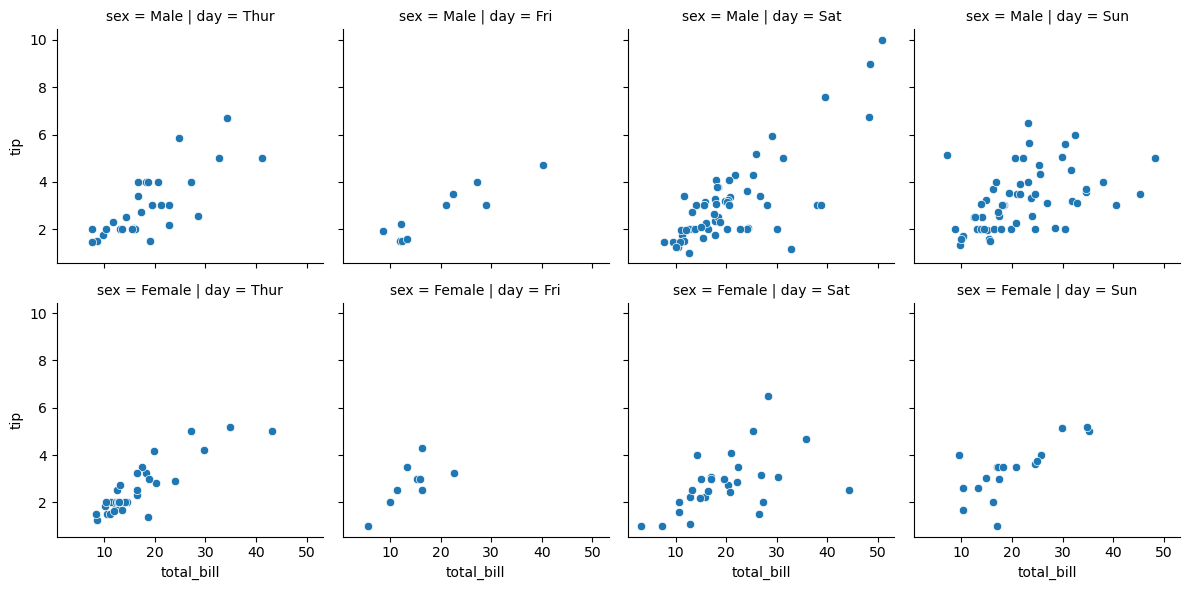

In [30]:
g = sns.FacetGrid(df, col="day",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

## Seaborn and matplotlib

<Axes: xlabel='sex', ylabel='tip'>

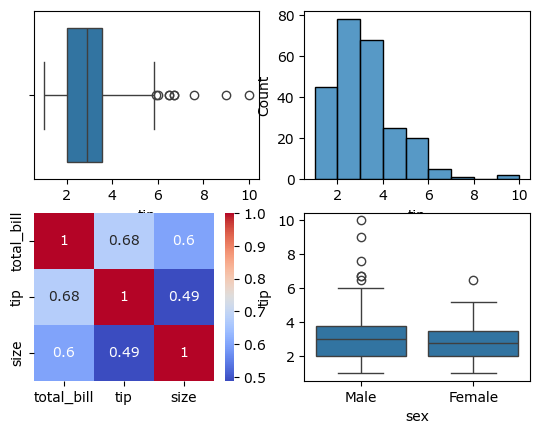

In [26]:
import seaborn as sns
df = sns.load_dataset('tips')
import matplotlib.pyplot as plt
%matplotlib inline
#Show the plots in the notebook.
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
sns.boxplot(data=df['tip'],orient='h',ax=ax1)

ax2 = fig.add_subplot(2, 2, 2)
sns.histplot(x="tip",data=df,bins=9)

ax3 = fig.add_subplot(2, 2, 3)
sns.heatmap(matrix_data_corr,annot=True,cmap='coolwarm')

ax4 = fig.add_subplot(2, 2, 4)
sns.boxplot(x="sex", y="tip", data=df)
